# Overview
This notebook begins the analysis of the term vectors by first computing TF-IDF scores. 

# Initialization

## Flickr

Build array of terms to be used for both global and local TF-IDF; needs to be run only once as it stores array on disk; shape is (ordered_msoas, ordered_terms). 

In [16]:
#
# initialization of array for Flickr term vectors
#

import sys
import psycopg2
import numpy

# variable declarations -- all VARIABLES are input arguments
CONN_DB = ""
PATH = "path/to/output/files"
OUTPUT_ARRAY_FILE = "flickr_tv_msoa_array.npy"

# open connection
con=psycopg2.connect(CONN_DB)
cur=con.cursor()
cur2=con.cursor()

# fetch msoa ids
# 'order by' is important for local TF-IDF and linking back results to spatial units
cur.execute('SELECT DISTINCT msoa2011code FROM london_flickr ORDER BY msoa2011code') 
query_result = cur.fetchall()
    
# query each msoa id, add term vectors, and combine terms vectors of all msoa to matrix
empty_array = [0] * 469 # length of all term vector elements
all_msoa = []
for msoa in query_result[:-1]:
    print(msoa[0], end='')
    cur2.execute('SELECT term_vector FROM london_flickr WHERE msoa2011code = %s',(msoa,))    
    query_result2 = cur2.fetchall()    
    msoa_tv_array = numpy.array(empty_array) # numpy array needed in order to be able to add individual elements of lists
    for photo in query_result2: 
        photo_tv_array = numpy.array(photo[0])        
        msoa_tv_array = msoa_tv_array + photo_tv_array # here the individual elements of the arrays get added up     
    all_msoa.append(msoa_tv_array.tolist()) # here the array needs to be converted back to a list for appending
    
con.close()

# save arrays to disk
numpy.save(PATH+OUTPUT_ARRAY_FILE, all_msoa)

E02000001E02000002E02000003E02000004E02000005E02000007E02000008E02000009E02000010E02000011E02000012E02000013E02000014E02000015E02000016E02000017E02000018E02000019E02000020E02000021E02000022E02000023E02000024E02000025E02000026E02000027E02000028E02000029E02000030E02000031E02000032E02000033E02000034E02000035E02000036E02000037E02000038E02000039E02000040E02000041E02000042E02000043E02000044E02000045E02000046E02000047E02000048E02000049E02000050E02000051E02000052E02000053E02000054E02000055E02000056E02000057E02000058E02000059E02000060E02000061E02000062E02000063E02000064E02000065E02000066E02000067E02000068E02000069E02000070E02000071E02000072E02000073E02000074E02000075E02000077E02000078E02000079E02000080E02000081E02000082E02000083E02000084E02000085E02000086E02000087E02000088E02000089E02000090E02000091E02000092E02000093E02000094E02000095E02000096E02000097E02000098E02000099E02000100E02000101E02000102E02000103E02000104E02000105E02000106E02000107E02000108E02000109E02000110E02000111E02000112E02000113E

E02000944E02000945E02000946E02000947E02000948E02000949E02000950E02000951E02000952E02000953E02000954E02000955E02000956E02000957E02000958E02000959E02000960E02000961E02000962E02000963E02000964E02000965E02000966E02000967E02000968E02000969E02000970E02000971E02000972E02000973E02000974E02000975E02000976E02000977E02000978E02000979E02000980E02000981E02000982E02000983E02006782E02006783E02006784E02006785E02006786E02006787E02006788E02006789E02006791E02006792E02006793E02006794E02006795E02006796E02006798E02006799E02006800E02006801E02006802E02006836E02006853E02006854E02006882E02006918E02006921E02006924E02006925E02006927E02006928E02006929E02006930E02006931

## Twitter

An important decision here is whether to exlude Twitter bots. While we do not exclude Flickr bulk uploads, which would be an argument for keeping Twitter bots, the Twitter bots arguably play a more distorting role, and for that reason we do not use them in the later analysis with sentiments. 

In [17]:
#
# initialization of array for Twitter term vectors
#

import sys
import psycopg2
import numpy

# variable declarations -- all VARIABLES are input arguments
CONN_DB = ""
PATH = "path/to/output/files"
OUTPUT_ARRAY_FILE = "twitter_tv_msoa_array.npy"

# open connection
con=psycopg2.connect(CONN_DB)
cur=con.cursor()
cur2=con.cursor()

# fetch msoa ids
# 'order by' is important for local TF-IDF and linking back results to spatial units
cur.execute('SELECT DISTINCT msoa2011code FROM london_twitter WHERE bot IS NOT True ORDER BY msoa2011code') 
query_result = cur.fetchall()
    
# query each msoa id, add term vectors, and combine terms vectors of all msoa to matrix
empty_array = [0] * 469 # length of all term vector elements
all_msoa = []
for msoa in query_result[:-1]:
    print(msoa[0], end='')
    cur2.execute('SELECT term_vector FROM london_twitter WHERE bot IS NOT True AND msoa2011code = %s',(msoa,))    
    query_result2 = cur2.fetchall()    
    msoa_tv_array = numpy.array(empty_array) # numpy array needed in order to be able to add individual elements of lists
    for photo in query_result2: 
        photo_tv_array = numpy.array(photo[0])        
        msoa_tv_array = msoa_tv_array + photo_tv_array # here the individual elements of the arrays get added up     
    all_msoa.append(msoa_tv_array.tolist()) # here the array needs to be converted back to a list for appending
    
con.close()

# save arrays to disk
numpy.save(PATH+OUTPUT_ARRAY_FILE, all_msoa)

E02000001E02000002E02000003E02000004E02000005E02000007E02000008E02000009E02000010E02000011E02000012E02000013E02000014E02000015E02000016E02000017E02000018E02000019E02000020E02000021E02000022E02000023E02000024E02000025E02000026E02000027E02000028E02000029E02000030E02000031E02000032E02000033E02000034E02000035E02000036E02000037E02000038E02000039E02000040E02000041E02000042E02000043E02000044E02000045E02000046E02000047E02000048E02000049E02000050E02000051E02000052E02000053E02000054E02000055E02000056E02000057E02000058E02000059E02000060E02000061E02000062E02000063E02000064E02000065E02000066E02000067E02000068E02000069E02000070E02000071E02000072E02000073E02000074E02000075E02000077E02000078E02000079E02000080E02000081E02000082E02000083E02000084E02000085E02000086E02000087E02000088E02000089E02000090E02000091E02000092E02000093E02000094E02000095E02000096E02000097E02000098E02000099E02000100E02000101E02000102E02000103E02000104E02000105E02000106E02000107E02000108E02000109E02000110E02000111E02000112E02000113E

E02000944E02000945E02000946E02000947E02000948E02000949E02000950E02000951E02000952E02000953E02000954E02000955E02000956E02000957E02000958E02000959E02000960E02000961E02000962E02000963E02000964E02000965E02000966E02000967E02000968E02000969E02000970E02000971E02000972E02000973E02000974E02000975E02000976E02000977E02000978E02000979E02000980E02000981E02000982E02000983E02006782E02006783E02006784E02006785E02006786E02006787E02006788E02006789E02006791E02006792E02006793E02006794E02006795E02006796E02006798E02006799E02006800E02006801E02006802E02006836E02006853E02006854E02006882E02006918E02006921E02006924E02006925E02006927E02006928E02006929E02006930E02006931

# Global TF-IDF
Using all MSOAs for TF-IDF computation. No need to vectorize if I use the vocabulary vectors. Save TF-IDF array for later.

## Flickr

In [18]:
#
# begin global TF-IDF for Flickr
#

import sys
import json
import numpy
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# variable declarations -- all VARIABLES are input arguments
PATH = "path/to/output/files"
INPUT_ARRAY_FILE = "flickr_tv_msoa_array.npy"
OUTPUT_ARRAY_FILE = "flickr_global_tfidf_array.npy"

# load array from previous step
all_msoa=numpy.load(PATH+INPUT_ARRAY_FILE)

# send array to TfidfTransformer
transformer = TfidfTransformer()
print(transformer)
global_tfidf = transformer.fit_transform(all_msoa)
global_tfidf_array = global_tfidf.toarray() # output sparse matrix needs conversion to array

# save array to disk
numpy.save(PATH+OUTPUT_ARRAY_FILE, global_tfidf_array)

TfidfTransformer()


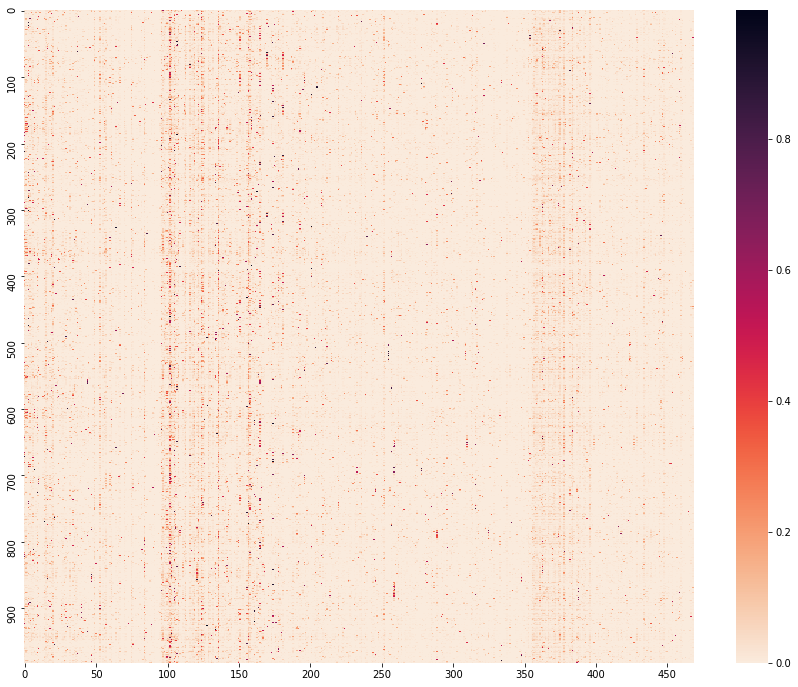

In [19]:
# quick overview of values in heat map (terms as columns, MSOA as rows)
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(global_tfidf_array, annot=False, xticklabels = 50, yticklabels = 100, ax=ax, cmap = sns.cm.rocket_r)
plt.show()

## Twitter

In [20]:
#
# global TF-IDF for Twitter
#

import sys
import json
import numpy
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# variable declarations -- all VARIABLES are input arguments
PATH = "path/to/output/files"
INPUT_ARRAY_FILE = "twitter_tv_msoa_array.npy"
OUTPUT_ARRAY_FILE = "twitter_global_tfidf_array.npy"

# load array from previous step
all_msoa = numpy.load(PATH+INPUT_ARRAY_FILE)

# send matrix to TfidfTransformer
transformer = TfidfTransformer()
print(transformer)
global_tfidf = transformer.fit_transform(all_msoa) # tfidf transformer seems happy with list
global_tfidf_array = global_tfidf.toarray() # output sparse matrix needs conversion

# save array to disk
numpy.save(PATH+OUTPUT_ARRAY_FILE, global_tfidf_array)

TfidfTransformer()


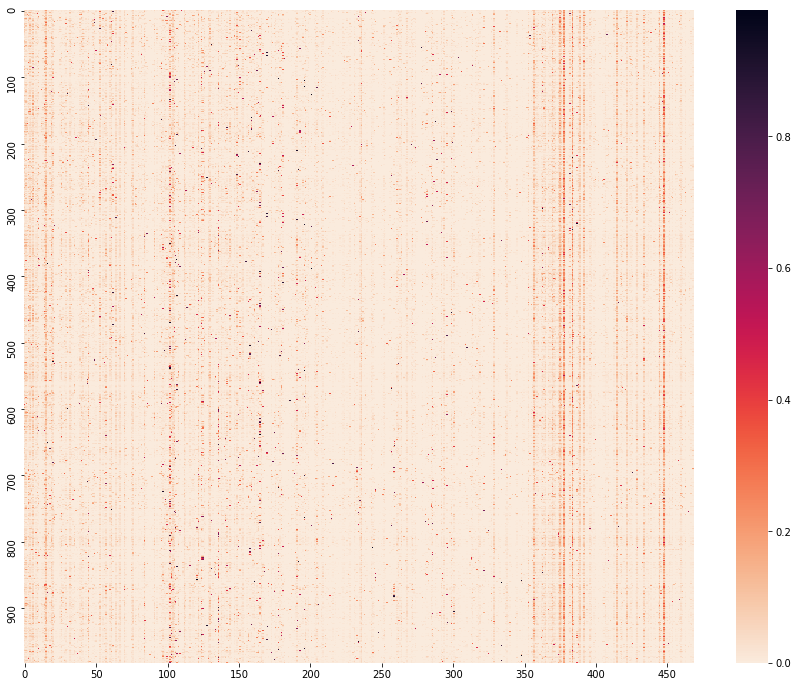

In [21]:
# quick overview of values in heat map (terms as columns, MSOA as rows)
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(global_tfidf_array, annot=False, xticklabels = 50, yticklabels = 100, ax=ax, cmap = sns.cm.rocket_r)
plt.show()

# Local TF-IDF
For the computation of local TF-IDF, two approaches are possible: Either iterate over all MSOAs, pick it and its neighbors, and compute TF-IDF in one go. However, this means that the array for each MSOA will have to be computed several times (everytime it is a neighbor). Alternatively, compute the matrix once as for global TF-IDF, then iterate over the MSOAs, and select only those rows of the array that correspond to the neighbors. This seems more elegant and can be done by collecting the id's of neighboring MSOA into a list which is then passed on to slice the array of term vectors. 

First, however, computation of neighbors:

`alter table london_msoa_2011_gen_4326 add column neighbors text;
with pairs as
(select p.code as pid, q.code as qid
 from london_msoa_2011_gen_4326 as p
 join london_msoa_2011_gen_4326 as q on st_touches(p.geom, q.geom)
 order by p.code, q.code),
results as
(select pid as id, array_agg(qid) as arr
 from pairs
 group by pid)
update london_msoa_2011_gen_4326 as t
set neighbors = r.arr
from results as r
where t.code=r.id;`

## Flickr

In [22]:
#
# local TF-IDF Flickr
# 

import sys
import psycopg2
import numpy
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter

# variable declarations -- all VARIABLES are input arguments
CONN_DB = ""
PATH = "path/to/output/files"
INPUT_ARRAY_FILE = "flickr_tv_msoa_array.npy"
OUTPUT_ARRAY_FILE = "flickr_local_tfidf_array.npy"

# load data from previous steps
all_msoa=numpy.load(PATH+INPUT_ARRAY_FILE)

# open connection
con=psycopg2.connect(CONN_DB)
cur=con.cursor()

# fetch msoa ids and build index dictionary 
cur.execute('SELECT DISTINCT msoa2011code FROM london_flickr ORDER BY msoa2011code') # need to get the same order as before
query_result = cur.fetchall()
msoa_array_idx = {}
counter = 0
for msoa in query_result[:-1]:
    msoa_array_idx[counter] = msoa[0]
    counter += 1    

transformer = TfidfTransformer()
print(transformer)
local_tfidf = []

# create reverse dictionary for lookup purposes
rev_msoa_array_idx = dict((v,k) for k,v in msoa_array_idx.items())

for key, value in msoa_array_idx.items():
      
    neighbors_msoa = []
    
    # create list of neighboring msoas
    cur.execute('SELECT neighbors FROM london_msoa_2011_gen_4326 WHERE code = %s',(value,))    
    query_result = cur.fetchall()

    # create local tf_idf array of neighboring msoas by slicing original array all_msoa
    neighbors_msoa.append(all_msoa[key]) # first add msoa under consideration
    neighbors = [x for x in str(query_result[0]).strip("(),'}{").split(',')]
    print(key, value)
    
    for neighbor in neighbors:
        try:
            neighbors_msoa.append(all_msoa[rev_msoa_array_idx[neighbor]])
        except:
            print(neighbor, " probably this neighboring msoa not in all_msoa because no UGGC there")

    # compute local tf_idf results
    neighbors_tfidf = transformer.fit_transform(neighbors_msoa)
    neighbors_tfidf_array = neighbors_tfidf.toarray()
    
    # add local tf_idf results to array containing all scores
    local_tfidf.append(neighbors_tfidf_array[0]) # only use the row containing the current msoa's results!
    
con.close()

local_tfidf_array = numpy.array(local_tfidf)

# save array to disk
numpy.save(PATH+OUTPUT_ARRAY_FILE, local_tfidf_array)

TfidfTransformer()
0 E02000001
1 E02000002
2 E02000003
3 E02000004
4 E02000005
5 E02000007
6 E02000008
7 E02000009
8 E02000010
9 E02000011
10 E02000012
11 E02000013
12 E02000014
13 E02000015
14 E02000016
15 E02000017
16 E02000018
17 E02000019
18 E02000020
19 E02000021
20 E02000022
21 E02000023
22 E02000024
23 E02000025
24 E02000026
25 E02000027
26 E02000028
27 E02000029
28 E02000030
29 E02000031
30 E02000032
31 E02000033
32 E02000034
33 E02000035
34 E02000036
35 E02000037
36 E02000038
37 E02000039
38 E02000040
39 E02000041
40 E02000042
41 E02000043
42 E02000044
43 E02000045
44 E02000046
45 E02000047
46 E02000048
47 E02000049
48 E02000050
49 E02000051
50 E02000052
51 E02000053
52 E02000054
53 E02000055
54 E02000056
55 E02000057
56 E02000058
57 E02000059
58 E02000060
59 E02000061
60 E02000062
61 E02000063
62 E02000064
63 E02000065
64 E02000066
65 E02000067
66 E02000068
67 E02000069
68 E02000070
69 E02000071
70 E02000072
71 E02000073
72 E02000074
73 E02000075
74 E02000077
75 E02000078
76 

598 E02000620
599 E02000621
600 E02000622
601 E02000623
602 E02000624
603 E02000625
604 E02000626
605 E02000627
606 E02000628
607 E02000629
608 E02000630
609 E02000631
610 E02000632
611 E02000633
612 E02000634
613 E02000635
614 E02000636
615 E02000637
616 E02000638
617 E02000639
618 E02000640
619 E02000641
620 E02000642
621 E02000643
622 E02000644
623 E02000645
624 E02000646
625 E02000647
626 E02000648
627 E02000649
628 E02000650
629 E02000651
630 E02000652
631 E02000653
632 E02000654
633 E02000655
634 E02000657
635 E02000658
636 E02000659
637 E02000660
638 E02000661
639 E02000662
640 E02000663
641 E02000664
642 E02000665
643 E02000666
644 E02000667
645 E02000668
646 E02000669
647 E02000670
648 E02000671
649 E02000672
650 E02000673
651 E02000674
652 E02000675
653 E02000676
654 E02000677
655 E02000678
656 E02000679
657 E02000680
658 E02000681
659 E02000682
660 E02000683
661 E02000685
662 E02000686
663 E02000687
664 E02000689
665 E02000690
666 E02000691
667 E02000692
668 E02000693
669 E0

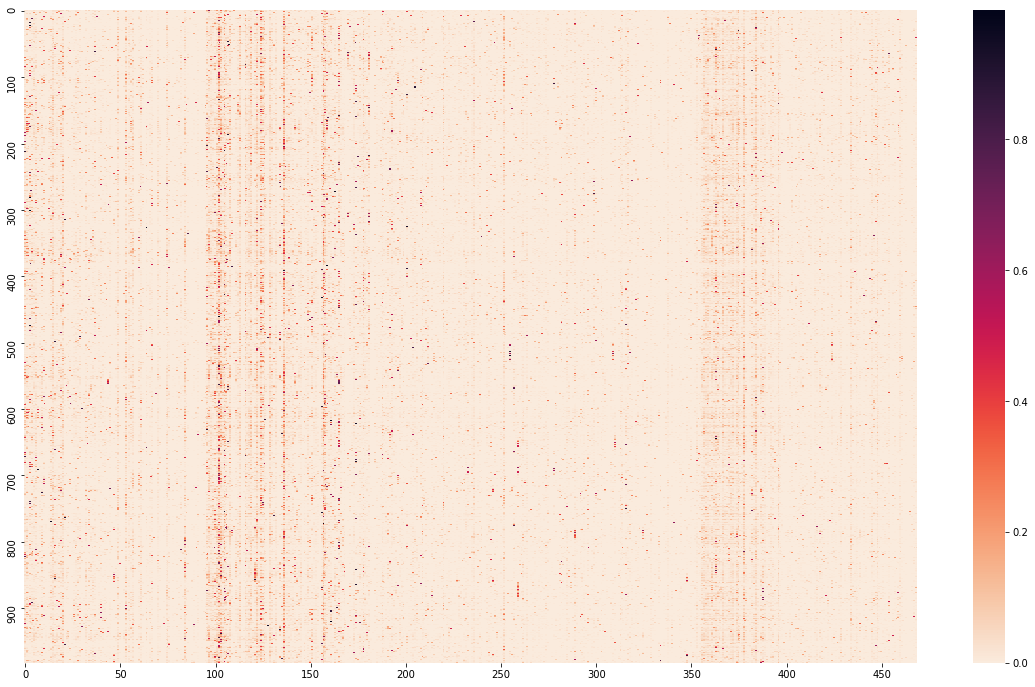

In [23]:
# quick overview of values in heat map (terms as columns, MSOA as rows)
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,12)) 
sns.heatmap(local_tfidf_array, annot=False, xticklabels = 50, yticklabels = 100, ax=ax, cmap = sns.cm.rocket_r)
plt.show()

## Twitter

In [24]:
#
# local TF-IDF Twitter
# 

import sys
import psycopg2
import numpy
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter

# variable declarations -- all VARIABLES are input arguments
CONN_DB = ""
PATH = "path/to/output/files"
INPUT_ARRAY_FILE = "twitter_tv_msoa_array.npy"
OUTPUT_ARRAY_FILE = "twitter_local_tfidf_array.npy"

# load data from previous steps
all_msoa=numpy.load(PATH+INPUT_ARRAY_FILE)

# open connection
con=psycopg2.connect(CONN_DB)
cur=con.cursor()

# fetch msoa ids and build index dictionary 
cur.execute('SELECT DISTINCT msoa2011code FROM london_twitter ORDER BY msoa2011code') # need to get the same order as before
query_result = cur.fetchall()
msoa_array_idx = {}
counter = 0
for msoa in query_result[:-1]:
    msoa_array_idx[counter] = msoa[0]
    counter += 1    

transformer = TfidfTransformer()
print(transformer)
local_tfidf = []

# create reverse dictionary for lookup purposes
rev_msoa_array_idx = dict((v,k) for k,v in msoa_array_idx.items())

for key, value in msoa_array_idx.items():
      
    neighbors_msoa = []
    
    # create list of neighboring msoas
    cur.execute('SELECT neighbors FROM london_msoa_2011_gen_4326 WHERE code = %s',(value,))    
    query_result = cur.fetchall()

    # create local tf_idf array of neighboring msoas by slicing original array all_msoa
    neighbors_msoa.append(all_msoa[key]) # first add msoa under consideration
    neighbors = [x for x in str(query_result[0]).strip("(),'}{").split(',')]
    print(key, value)
    
    for neighbor in neighbors:
        try:
            neighbors_msoa.append(all_msoa[rev_msoa_array_idx[neighbor]])
        except:
            print(neighbor, " probably this neighboring msoa not in all_msoa because no UGGC there")

    # compute local tf_idf results
    neighbors_tfidf = transformer.fit_transform(neighbors_msoa)
    neighbors_tfidf_array = neighbors_tfidf.toarray()
    
    # add local tf_idf results to array containing all scores
    local_tfidf.append(neighbors_tfidf_array[0]) # only use the row containing the current msoa's results!
    
con.close()

local_tfidf_array = numpy.array(local_tfidf)

# save array to disk
numpy.save(PATH+OUTPUT_ARRAY_FILE, local_tfidf_array)

TfidfTransformer()
0 E02000001
1 E02000002
2 E02000003
3 E02000004
4 E02000005
5 E02000007
6 E02000008
7 E02000009
8 E02000010
9 E02000011
10 E02000012
11 E02000013
12 E02000014
13 E02000015
14 E02000016
15 E02000017
16 E02000018
17 E02000019
18 E02000020
19 E02000021
20 E02000022
21 E02000023
22 E02000024
23 E02000025
24 E02000026
25 E02000027
26 E02000028
27 E02000029
28 E02000030
29 E02000031
30 E02000032
31 E02000033
32 E02000034
33 E02000035
34 E02000036
35 E02000037
36 E02000038
37 E02000039
38 E02000040
39 E02000041
40 E02000042
41 E02000043
42 E02000044
43 E02000045
44 E02000046
45 E02000047
46 E02000048
47 E02000049
48 E02000050
49 E02000051
50 E02000052
51 E02000053
52 E02000054
53 E02000055
54 E02000056
55 E02000057
56 E02000058
57 E02000059
58 E02000060
59 E02000061
60 E02000062
61 E02000063
62 E02000064
63 E02000065
64 E02000066
65 E02000067
66 E02000068
67 E02000069
68 E02000070
69 E02000071
70 E02000072
71 E02000073
72 E02000074
73 E02000075
74 E02000077
75 E02000078
76 

635 E02000658
636 E02000659
637 E02000660
638 E02000661
639 E02000662
640 E02000663
641 E02000664
642 E02000665
643 E02000666
644 E02000667
645 E02000668
646 E02000669
647 E02000670
648 E02000671
649 E02000672
650 E02000673
651 E02000674
652 E02000675
653 E02000676
654 E02000677
655 E02000678
656 E02000679
657 E02000680
658 E02000681
659 E02000682
660 E02000683
661 E02000685
662 E02000686
663 E02000687
664 E02000689
665 E02000690
666 E02000691
667 E02000692
668 E02000693
669 E02000694
670 E02000695
671 E02000696
672 E02000697
673 E02000698
674 E02000699
675 E02000700
676 E02000701
677 E02000702
678 E02000703
679 E02000704
680 E02000705
681 E02000706
682 E02000707
683 E02000708
684 E02000709
685 E02000710
686 E02000711
687 E02000712
688 E02000713
689 E02000714
690 E02000715
691 E02000716
692 E02000717
693 E02000718
694 E02000719
695 E02000720
696 E02000721
697 E02000722
698 E02000723
699 E02000724
700 E02000725
701 E02000726
702 E02000727
703 E02000728
704 E02000729
705 E02000730
706 E0

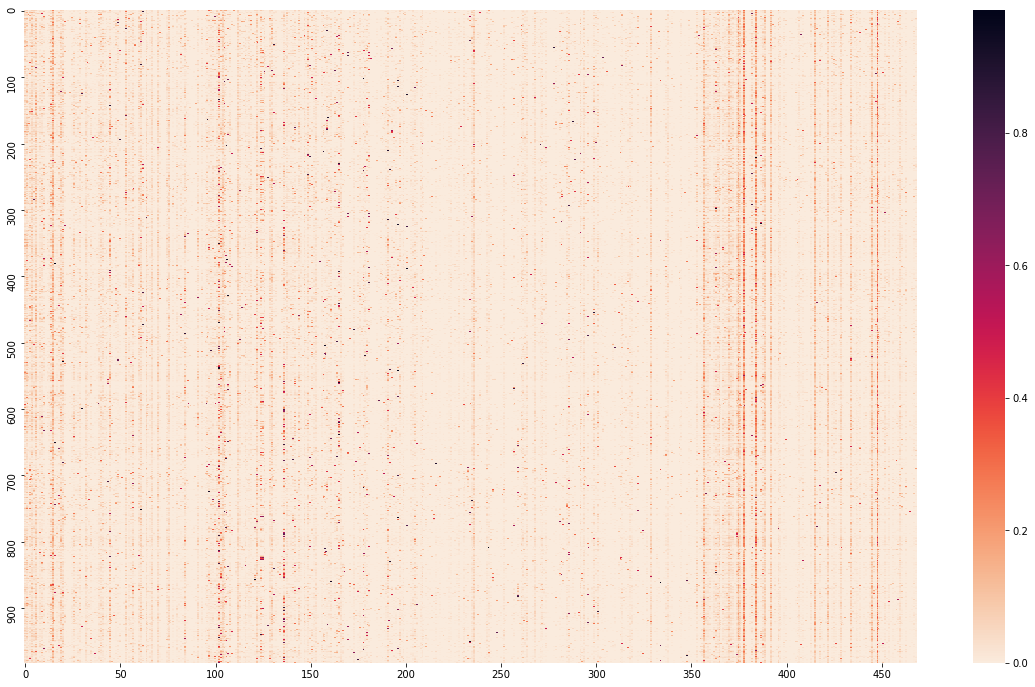

In [25]:
# quick overview of values in heat map (terms as columns, MSOA as rows)
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,12)) 
sns.heatmap(local_tfidf_array, annot=False, xticklabels = 50, yticklabels = 100, ax=ax, cmap = sns.cm.rocket_r)
plt.show()